# GRIP : the sparks foundation

# Data Science and Business Analytics Intern

**Author: vivek popat shedge**

**task 1 : Prediction using suprvisied ML**


**batch: jan2023**

**In this task , we have to predict the percentage score of a student based on the number of hours studied. The task has two variables namely independent variable 'number of hours' studied and target variable 'percentage score'.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("C:/Users/MSI USER/Downloads/task 1 data1.csv")

In [8]:
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail()

,hours,scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


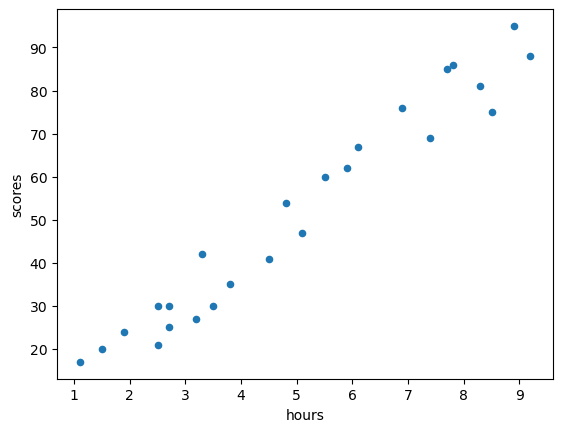

In [12]:
data.plot(kind='scatter',x='hours',y='scores');
plt.show()

In [13]:
data.corr()

,hours,scores
hours,1.000000,0.976191
scores,0.976191,1.000000


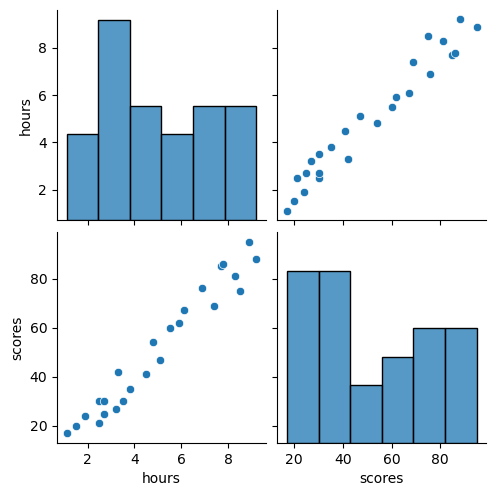

In [26]:
sns.pairplot(data)

C:\Users\MSI USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scores', ylabel='Density'>

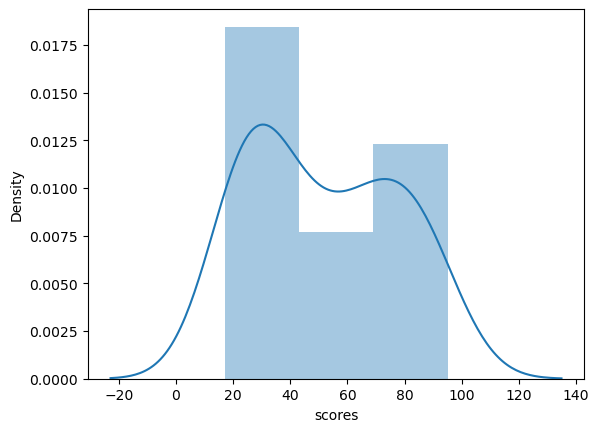

In [30]:
sns.distplot(data['scores'])

**Linear regression**

In [31]:
from sklearn.model_selection import train_test_split
X = data.drop(['scores'],axis=1)
Y = data[['scores']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
regressor.coef_

array([[9.78856669]])

In [34]:
regressor.intercept_

array([2.37081538])

In [35]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9484997422695115


In [36]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9568211104435257


In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [38]:
score.mean()

0.9180771341891051

In [39]:
regressor.coef_[0]

array([9.78856669])

In [40]:
coeff_df = pd.DataFrame(regressor.coef_[0],np.array(list(X.columns)),columns=['scores'])
coeff_df

,scores
hours,9.788567


C:\Users\MSI USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

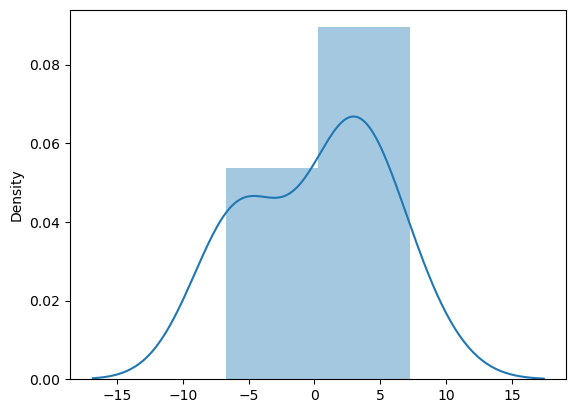

In [41]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

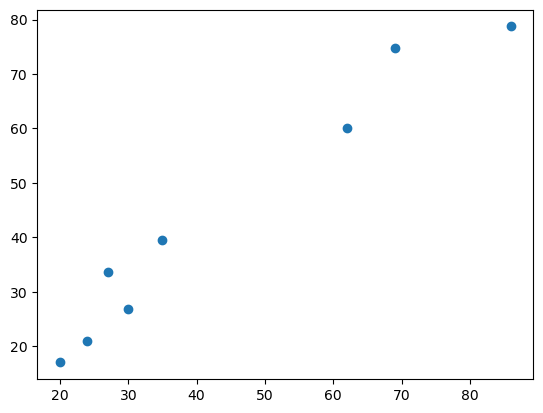

In [42]:
plt.scatter(y_test,prediction)

**Model evalution**

In [44]:
from sklearn import metrics


In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 4.419727808027652
MSE: 22.96509721270043
RMSE: 4.792191274636315
